In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = {1:87029, 2:113407, 3:84843, 4:104994, 5:99327, 6:92052, 7:60684}

In [3]:
weekly_avg_series = pd.Series(data)

In [4]:
df = pd.DataFrame(weekly_avg_series)
df.rename(columns={0: 'weekly_avg'}, inplace=True)

In [5]:
df.describe()

,weekly_avg
count,7.000000
mean,91762.285714
std,17014.802905
min,60684.000000
25%,85936.000000
50%,92052.000000
75%,102160.500000
max,113407.000000


In [6]:
# Inputs for confidence interval
n = len(df)
mean = df['weekly_avg'].mean()
std = df['weekly_avg'].std()

se = std / (math.sqrt(n))

In [7]:
# Calculate confidence interval
lower_ci = (mean - 1.96 * se)
upper_ci = (mean + 1.96 * se)
print(lower_ci, upper_ci)

79157.54332794028 104367.02810063114


In [31]:
df['upper_ci']=upper_ci
df['lower_ci']=lower_ci

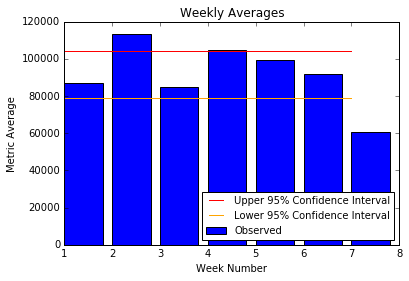

In [39]:
# create plot
x = df.index.values
y = df['weekly_avg']

# Choose the height of the CI bars
upper_ci = df['upper_ci']
lower_ci = df['lower_ci']

r1 = np.arange(len(x))

plt.bar(x, y, color="blue", label="Observed")
plt.plot(x, upper_ci, color="Red", label="Upper Bound 95% Confidence Interval")
plt.plot(x, lower_ci, color="Orange", label="Lower Bound 95% Confidence Interval")
plt.title("Weekly Averages")
plt.xlabel("Week Number")
plt.ylabel("Metric Average")
plt.legend(loc = 'best', prop={'size': 10})
plt.show()